In [35]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
import string
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
complaints = pd.read_csv("./Data/complaints.csv")

In [3]:
complaints

,Consumer complaint narrative,Issue
0,My name is XXXX XXXX this complaint is not mad...,Incorrect information on your report
1,I searched on XXXX for XXXXXXXX XXXX and was ...,Fraud or scam
2,I have a particular account that is stating th...,Incorrect information on your report
3,I have not supplied proof under the doctrine o...,Attempts to collect debt not owed
4,Hello i'm writing regarding account on my cred...,Incorrect information on your report
...,...,...
353427,Collections account I have no knowledge of,Attempts to collect debt not owed
353428,"Dear CFPB Team, The reason for my complaint is...",Attempts to collect debt not owed
353429,FRCA violations : Failing to Follow Debt Dispu...,Attempts to collect debt not owed
353430,"My Father, a XXXX XXXX acquired an HECM rever...",Struggling to pay mortgage


In [4]:
### Convert column name so that they don't have space and are more readable
complaints = complaints.rename(columns = {'Consumer complaint narrative' : 'complaint_narrative', 'Issue' : 'complaint_issue'})

<Axes: >

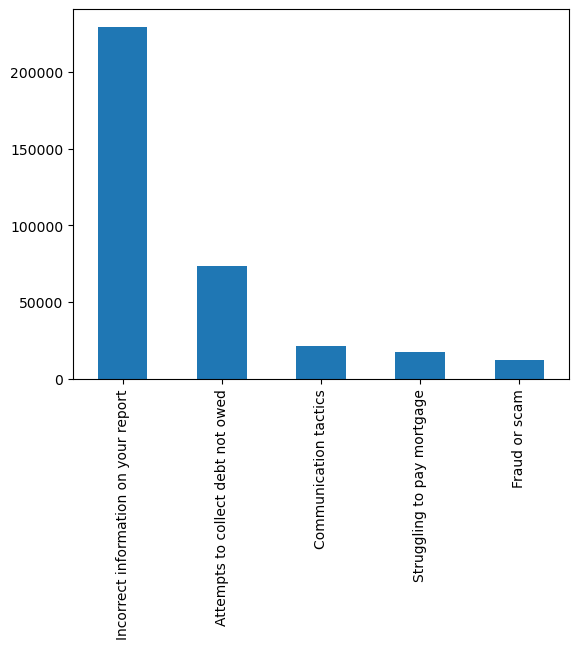

In [5]:
complaints['complaint_issue'].value_counts().plot(kind = 'bar')

In [6]:
# Use mapping to convert columns to numerical values
issue = {'Attempts to collect debt not owed': 1, 
                 'Communication tactics': 2, 
                 'Fraud or scam': 3, 
                 'Incorrect information on your report': 4,
                 'Struggling to pay mortgage': 5}
# replace the issue values with numerical values
complaints['complaint_issue'] = complaints['complaint_issue'].replace(issue)

<Axes: ylabel='Frequency'>

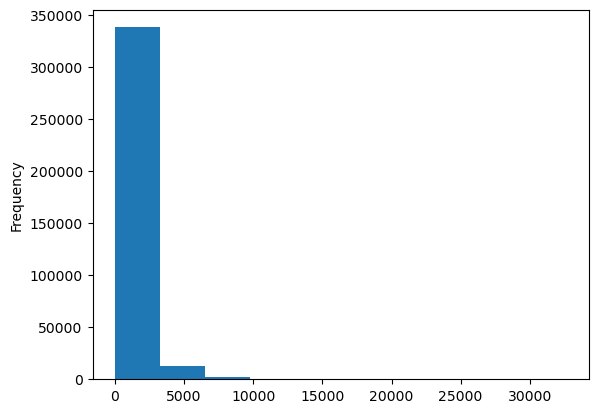

In [7]:
complaints['complaint_narrative'].apply(len).plot(kind = 'hist')

In [8]:
#Keep the length columns as a new column
complaints['complaint_length'] = complaints['complaint_narrative'].apply(len)

# Remove all the X patterns from text
complaints['complaint_narrative'] = complaints['complaint_narrative'].str.replace(r'[xX][xX]+',"")

# stripping all numeric values from complaints
complaints['complaint_narrative'] = complaints['complaint_narrative'].str.replace('\d+', '', regex=True)

/var/folders/s3/9_r9v9px7_v0q69b5zcbnmsm0000gn/T/ipykernel_5145/2336528910.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  complaints['complaint_narrative'] = complaints['complaint_narrative'].str.replace(r'[xX][xX]+',"")


In [9]:
complaints.loc[0]['complaint_narrative']

'My name is   this complaint is not made in error neither is it being made by a third party. I declare under penalty of perjury I am alleging that a person or company- without my authorization- from unauthorized use of my social security number and card used my personal identifying information to apply for goods, services, or money ; and, was successful in creating some accounts. I have no knowledge of this and all is being investigated by the FTC and Under  U.S. Code b Permissible purposes of consumer reports I never gave any written consent to report anything on my consumer reports.       Date Opened : // Balance : {$.}. Please delete this account ASAP.'

In [10]:
#stopwords_list = stopwords.words('english') + list(string.punctuation)

In [11]:
# list of potentially unique redaction patterns.  
redaction_patterns = complaints['complaint_narrative'].str.extractall(r'(X+)').reset_index()[0].unique()

# display the results
print(redaction_patterns)

['X']


In [12]:
lemm = WordNetLemmatizer()

def make_lemma(list_of_words):
    
    # lemmatize each word
    lemmatized_list = []
    for idx, word in enumerate(list_of_words):
        lemmatized_list.append(lemm.lemmatize(word))
    return lemmatized_list


In [13]:
# function to lemmatize the text

lemm = WordNetLemmatizer()

def make_lemma(list_of_words):
    # Lemmatize each word
    lemmatized_list =[]
    lemmatized_string = []
    lemmatized_list = [lemm.lemmatize(word) for word in list_of_words]
    
    # Join lemmatized words into a single string
    lemmatized_string = ' '.join(lemmatized_list)
    
    return lemmatized_string


In [14]:
complaints['lemmatized_text'] = complaints['complaint_narrative'].apply(lambda x: make_lemma(x.split()))

In [15]:
complaints

,complaint_narrative,complaint_issue,complaint_length,lemmatized_text
0,My name is this complaint is not made in err...,4,711,My name is this complaint is not made in error...
1,I searched on for and was pointed to a web...,3,1958,I searched on for and wa pointed to a website ...
2,I have a particular account that is stating th...,4,294,I have a particular account that is stating th...
3,I have not supplied proof under the doctrine o...,1,3444,I have not supplied proof under the doctrine o...
4,Hello i'm writing regarding account on my cred...,4,876,Hello i'm writing regarding account on my cred...
...,...,...,...,...
353427,Collections account I have no knowledge of,1,42,Collections account I have no knowledge of
353428,"Dear CFPB Team, The reason for my complaint is...",1,4586,"Dear CFPB Team, The reason for my complaint is..."
353429,FRCA violations : Failing to Follow Debt Dispu...,1,4328,FRCA violation : Failing to Follow Debt Disput...
353430,"My Father, a acquired an HECM reverse mortg...",5,5418,"My Father, a acquired an HECM reverse mortgage..."


In [16]:
def tokenize_and_remove_stopwords(dataframe, column_name):
    stopwords_list = stopwords.words('english') + list(string.punctuation) 

    tokenized_data = []
    for row in dataframe[column_name]:
        tokens = nltk.word_tokenize(row.lower())
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
        tokenized_data.append(filtered_tokens)

    return tokenized_data

#complaints['tokens_lemmatized'] = tokenize_and_remove_stopwords(complaints, 'complaint_lemmatized')

In [17]:
#' '.join(complaints.loc[0, 'lemmatized_text'])

In [18]:
X = complaints[['lemmatized_text']]
y = complaints['complaint_issue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [19]:
stopwords_list = stopwords.words('english')

vect = CountVectorizer(stop_words = stopwords_list, min_df = 2) 

X_train_vec = vect.fit_transform(X_train['lemmatized_text'])
X_test_vec = vect.transform(X_test['lemmatized_text'])

In [20]:
vect.vocabulary_

{'filed': 12408,
 'identity': 15358,
 'theft': 31171,
 'report': 26197,
 'learned': 18042,
 'someone': 29064,
 'wa': 34143,
 'using': 33476,
 'incarceration': 15859,
 'submitted': 30062,
 'documentation': 9869,
 'transunion': 32062,
 'disregarded': 9644,
 'even': 11370,
 'block': 3872,
 'account': 371,
 'day': 8018,
 'upon': 33353,
 'receiving': 25168,
 'information': 16282,
 'also': 1431,
 'received': 25157,
 'letter': 18206,
 'irs': 17201,
 'stating': 29606,
 'tax': 30802,
 'return': 26836,
 'name': 20418,
 'us': 33404,
 'dept': 8751,
 'educatio': 10423,
 'acct': 435,
 'closed': 5759,
 'send': 28027,
 'written': 34955,
 'notification': 21060,
 'reported': 26207,
 'consumer': 6837,
 'reporting': 26222,
 'agency': 1062,
 'never': 20725,
 'ever': 11381,
 'late': 17909,
 'although': 1454,
 'updated': 33314,
 'chargeoff': 5301,
 'providing': 24389,
 'severe': 28225,
 'scandalous': 27640,
 'action': 589,
 'destroying': 8922,
 'perfect': 22766,
 'payment': 22583,
 'history': 14830,
 'credit

In [21]:
sum(vect.vocabulary_.values()) 

619326415

In [22]:
len(vect.vocabulary_)

35195

In [23]:
word_counts = pd.DataFrame({
    'words': vect.vocabulary_.keys(), 
    'frequency': vect.vocabulary_.values()
})

word_counts.head()

,words,frequency
0,filed,12408
1,identity,15358
2,theft,31171
3,report,26197
4,learned,18042


In [24]:
word_counts = pd.DataFrame({
'words': vect.get_feature_names_out(),
'frequency': np.array(X_train_vec.sum(axis = 0)).flatten()
})

word_counts.sort_values('frequency', ascending=False).head()

,words,frequency
7557,credit,553141
371,account,479316
34143,wa,441962
26197,report,340847
16282,information,290497


In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb = MultinomialNB().fit(X_train_vec, y_train)

y_pred = nb.predict(X_test_vec)

In [27]:
accuracy_score(y_test, y_pred)

0.8195183231852238

In [28]:
confusion_matrix(y_test, y_pred)

array([[11707,  2120,   495,  3681,   288],
       [  557,  4533,    50,    99,    72],
       [   61,    63,  2825,   106,    32],
       [ 4891,   894,   801, 49115,  1625],
       [   28,    35,    17,    32,  4231]])

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.64      0.66     18291
           2       0.59      0.85      0.70      5311
           3       0.67      0.92      0.78      3087
           4       0.93      0.86      0.89     57326
           5       0.68      0.97      0.80      4343

    accuracy                           0.82     88358
   macro avg       0.71      0.85      0.76     88358
weighted avg       0.83      0.82      0.82     88358



In [36]:
ConfusionMatrixDisplay(nb, y_test, y_pred)

TypeError: __init__() takes 2 positional arguments but 4 were given

In [30]:
plot_confusion_matrix(nb, y_test, y_pred)

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
logreg = LogisticRegression(max_iter = 10000)

logreg.fit(X_train_vec, y_train)

y_pred = logreg.predict(X_test_vec)

print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

In [32]:
from xgboost import XGBClassifier
#from sklearn.model_selection import GridSearchCV

xg = XGBClassifier()#colsample_bytree=0.3, learning_rate= 0.05, max_depth= 6, n_estimators= 500)
xg.fit(X_train_vec, y_train)
y_pred = xg.predict(X_test_vec)

print('Accuracy Score XGBoost:',accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
#print(pd.crosstab(y_test, y_pred_xg, rownames = ['Actual'], colnames = ['Predicted']))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1 2 3 4 5]

In [33]:
complaints_proc['complaints_issue'] = complaints_proc['complaints_issue'] - 1

NameError: name 'complaints_proc' is not defined